In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyscf import scf, gto

plt.style.use(["seaborn"])

# s-Funktionen 

## H2 

In [3]:
basis = "3-21++g"
H2_1 = gto.Mole(atom="H 0.0 0.0 0.0\nH 1.0 0.0 0.0", basis=basis)
H2_1.build()
H2_2 = gto.Mole(atom="H 0.0 0.0 0.0\nH 0.0 1.0 0.0", basis=basis)
H2_2.build()

### Overlap 

0.0


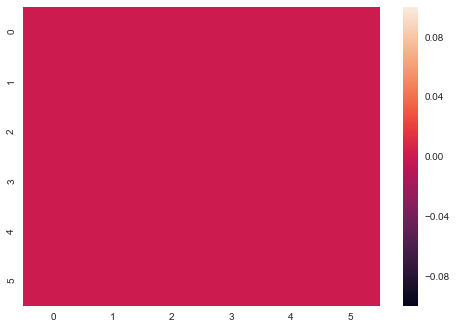

In [4]:
sH2_1 = scf.hf.get_ovlp(H2_1)
sH2_2 = scf.hf.get_ovlp(H2_2)

print(np.mean(np.abs(sH2_1 - sH2_2)))

sns.heatmap(sH2_1-sH2_2)
plt.show()

### Density 

2.2936899293471115e-17


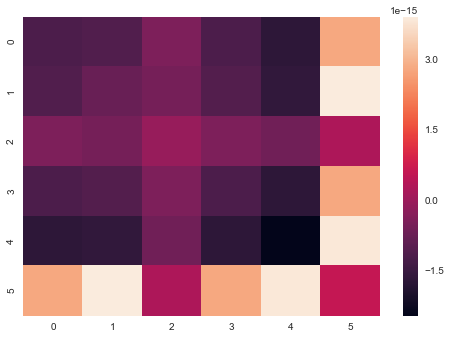

In [5]:
def calculate_density(mol):
    mf = scf.RHF(mol)
    mf.verbose = 0
    mf.scf()
    return mf.make_rdm1()

pH2_1 = calculate_density(H2_1)
pH2_2 = calculate_density(H2_2)
print(np.mean(pH2_1 - pH2_2))

sns.heatmap(pH2_1 - pH2_2)
plt.show()

# Ausgangsmolecule

in x direction

In [6]:
mol = gto.Mole()
mol.atom = """
F 0.0 0.0 0.0
H 1.0 0.0 0.0
"""
mol.basis = "sto-3g"

mol.build()

In [89]:
s = scf.hf.get_ovlp(mol)
print(s)

[[1.      0.23799 0.      0.      0.      0.04058]
 [0.23799 1.      0.      0.      0.      0.39514]
 [0.      0.      1.      0.      0.      0.31965]
 [0.      0.      0.      1.      0.      0.     ]
 [0.      0.      0.      0.      1.      0.     ]
 [0.04058 0.39514 0.31965 0.      0.      1.     ]]


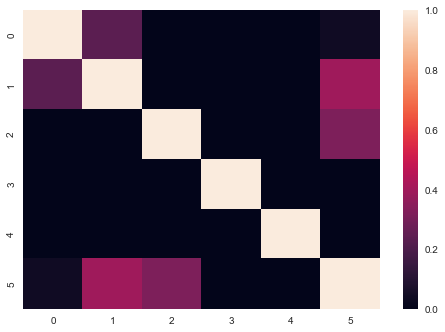

In [90]:
sns.heatmap(s)
plt.show()

In [176]:
s.T@s

array([[1.05829, 0.49201, 0.01297, 0.     , 0.     , 0.17519],
       [0.49201, 1.21278, 0.12631, 0.     , 0.     , 0.79994],
       [0.01297, 0.12631, 1.10218, 0.     , 0.     , 0.6393 ],
       [0.     , 0.     , 0.     , 1.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 1.     , 0.     ],
       [0.17519, 0.79994, 0.6393 , 0.     , 0.     , 1.25996]])

# 90 ° Rotation 
in y direction

In [91]:
1/np.sqrt(2)

0.7071067811865475

In [92]:
mol90 = gto.Mole()
mol90.atom = """
F 0.0 0.0 0.0
H 0.0 1.0 0.0
"""
mol90.basis = "sto-3g"
mol90.build()

s90 = scf.hf.get_ovlp(mol90)
print(s90)

[[1.      0.23799 0.      0.      0.      0.04058]
 [0.23799 1.      0.      0.      0.      0.39514]
 [0.      0.      1.      0.      0.      0.     ]
 [0.      0.      0.      1.      0.      0.31965]
 [0.      0.      0.      0.      1.      0.     ]
 [0.04058 0.39514 0.      0.31965 0.      1.     ]]


In [93]:
np.set_printoptions(precision=5, suppress=True)
print(s - s90)

[[ 0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.31965]
 [ 0.       0.       0.       0.       0.      -0.31965]
 [ 0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.31965 -0.31965  0.       0.     ]]


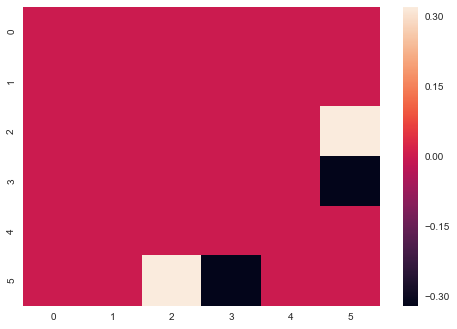

In [94]:
sns.heatmap((s - s90))

0.19670692001959122


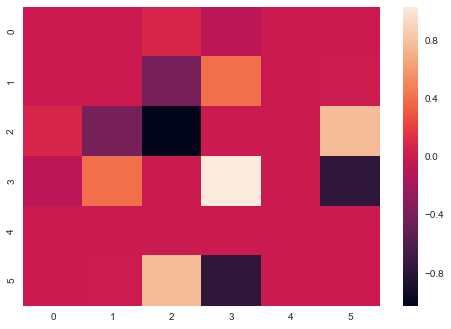

In [95]:
pMol = calculate_density(mol)
pMol90 = calculate_density(mol90)
print(np.mean(np.abs(pMol - pMol90)))

sns.heatmap(pMol - pMol90)

# Rotation of the Basis 

## Rotation Matrix 

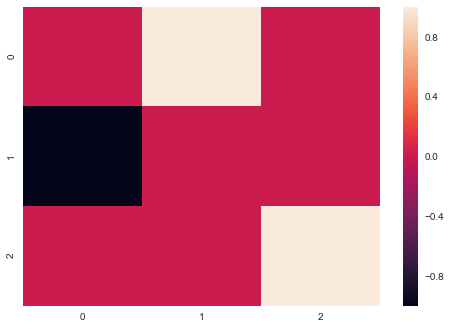

In [119]:
def rotation_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

R90 = rotation_z(-np.pi/2)
sns.heatmap(R90)

## OverlapMatrix
over lap of mol basis to basis rotated 90 degree around z axis. Thus pz is not changed

In [120]:
print(s90)
print(R)

[[1.      0.23799 0.      0.      0.      0.04058]
 [0.23799 1.      0.      0.      0.      0.39514]
 [0.      0.      1.      0.      0.      0.     ]
 [0.      0.      0.      1.      0.      0.31965]
 [0.      0.      0.      0.      1.      0.     ]
 [0.04058 0.39514 0.      0.31965 0.      1.     ]]
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0. -0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]


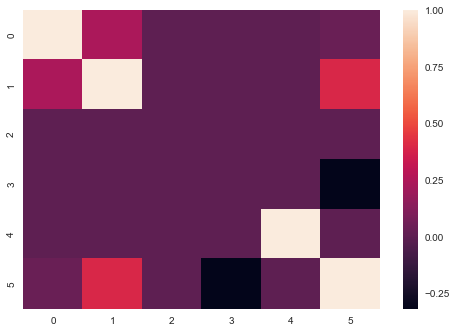

In [172]:

def make_basis_rotation(R, S):
    Q = S.copy()
    for i in range(3):
        upper = 0
        lower = 0
        for j in range(3):
            upper += S[j + 2, 5] * R[i, j]
            lower += S[5, j + 2] * R[i, j] # TODO: sollte nicht eines der beiden R transponiert sein?
            #print("r and s: i={0},j={1}".format(i+2,j))
            #print(R[i,j], R[j,i], s[j + 2, 5], s[5, j + 2])

        #print("\nlowerupper")
        #print(upper, lower)
        #print("\n\n")

        Q[i + 2, 5] = lower
        Q[5, i + 2] = upper
        
    Q[2:5, 2:5] = R.T * S[2:5, 2:5]
    print(R)
    print(S[2:5, 2:5])
    print(Q[2:5, 2:5])
    
    return Q

q90 = make_basis_rotation(R90, s)
sns.heatmap(q90)

0.16651962206270507


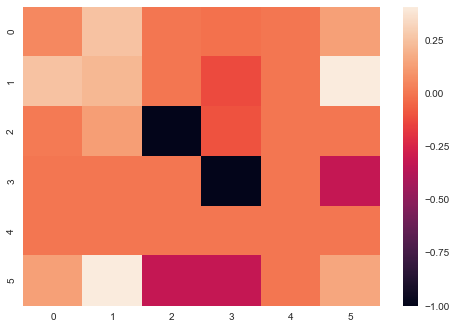

In [173]:
s_trans = s @ q90.T

print(np.mean(np.abs(s_trans-s90)))
sns.heatmap(s_trans-s)